In [1]:
import uproot 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
 pip install awkward


Note: you may need to restart the kernel to use updated packages.


In [135]:
#tf = uproot.open("/jupyter-workspace/private/new_RECO/reconstructed_LNGS/{0:s}".format(args[0]))
#name = tf["Events;1"].keys()
tf = uproot.open("/jupyter-workspace/private/new_RECO/reconstructed_LNGS/reco_run01173_3D.root")
name = tf["Events;1"].keys()

#creo un DF solo con le colonne
columns = name
df = pd.DataFrame(columns = columns)

In [136]:
df

,run,event,pedestal_run,cmos_integral,cmos_mean,cmos_rms,nSc,sc_size,sc_nhits,sc_integral,...,sc_tgaussamp,sc_tgaussmean,sc_tgausssigma,sc_tchi2,sc_tstatus,sc_lgaussamp,sc_lgaussmean,sc_lgausssigma,sc_lchi2,sc_lstatus


In [137]:
#Creo un np.array fillandolo con i dati presi dal .root
data = []
for k in range(0,len(tf["Events;1"].keys())):
   # data = tf["Events;1/"+name[k]].array(library="np")
    data.append(tf["Events;1/"+name[k]].array(library="np"))

In [138]:
#Riempio le colonne del DF con i dati presi
for icolumn,datavalue in enumerate(data):
    #print(columns[icolumn], datavalue)
    df[columns[icolumn]] = datavalue

In [ ]:
nRedpix  #int
redpix_ix  #ndarray
redpix_iy  #ndarray
redpix_iz  #ndarray

In [180]:
#type(df['redpix_ix'][0])

In [ ]:
### MEDIE DEGLI SC_

In [8]:
df_colo = df[columns[7:]]

In [13]:
df_colo

,sc_size,sc_nhits,sc_integral,sc_corrintegral,sc_rms,sc_energy,sc_pathlength,sc_redpixIdx,nRedpix,redpix_ix,...,sc_tgaussamp,sc_tgaussmean,sc_tgausssigma,sc_tchi2,sc_tstatus,sc_lgaussamp,sc_lgaussmean,sc_lgausssigma,sc_lchi2,sc_lstatus
0,"[7040.0, 14944.0, 4032.0, 4096.0, 1504.0, 896....","[3909.0, 5263.0, 1381.0, 1296.0, 612.0, 430.0,...","[56789.074, 52182.793, 12084.108, 11462.506, 9...","[183329.25, 169230.8, 35402.89, 38674.086, 354...","[10.738791, 7.7003665, 6.5969553, 7.0560036, 1...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0...",8096,"[1684, 1684, 1684, 1684, 1685, 1685, 1685, 168...",...,"[1750.6758, 834.95276, 1308.6918, 1275.2498, 1...","[52.842224, 64.30926, 17.212496, 26.531132, 15...","[20.586283, 36.609806, 7.179801, 6.32524, 5.65...","[525.3652, 939.0435, 36.284794, 69.60904, 27.8...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...","[869.5483, 151.97334, 121.7971, 135.41422, 413...","[63.033546, 98.644745, 125.39836, 198.32426, 2...","[39.63781, 736.1713, 165.57172, 86.23344, 20.1...","[701.3192, 780.1997, 333.36777, 288.2851, 93.3...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ..."
1,"[16064.0, 18464.0, 5712.0, 10208.0, 4656.0, 80...","[6704.0, 6443.0, 2803.0, 3651.0, 2040.0, 2511....","[71286.47, 61037.74, 39605.28, 33568.152, 3169...","[208083.34, 199448.97, 128705.07, 100764.94, 1...","[7.9755874, 7.530536, 10.313829, 7.0558987, 11...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",3776,"[1964, 1964, 1964, 1964, 1965, 1965, 1965, 196...",...,"[1057.1603, 3972.8774, 1335.7482, 693.7811, 19...","[110.192085, 57.462734, 45.33808, 81.2633, 32....","[30.215086, 10.882736, 17.040924, 27.544647, 1...","[1719.7281, 401.6924, 481.8225, 668.44135, 101...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...","[234.79771, 131.89502, 365.598, 108.41066, 405...","[258.47372, 314.45676, 99.2468, 568.0042, 114....","[324.97784, 1211.8044, 108.77804, 2749.0698, 6...","[1135.8635, 1227.5658, 741.3493, 641.2847, 438...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ..."
2,"[15408.0, 15184.0, 11680.0, 6928.0, 5568.0, 27...","[6474.0, 5479.0, 4046.0, 2419.0, 2045.0, 1030....","[82398.04, 58953.06, 43724.8, 24973.8, 21831.5...","[301769.34, 208545.78, 173343.28, 81072.97, 77...","[10.218204, 8.628267, 9.162967, 7.8290153, 8.7...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",3984,"[1100, 1100, 1100, 1100, 1101, 1101, 1101, 110...",...,"[2299.8088, 4225.6846, 2120.1326, 3050.7349, 9...","[52.28468, 30.671211, 46.048313, 20.027273, 52...","[23.238789, 10.902573, 13.53819, 6.403752, 15....","[683.4388, 68.61221, 533.77637, 37.999634, 245...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...","[220.34354, 128.18373, 151.23637, 120.098885, ...","[313.02805, 592.2625, 768.90967, 163.77045, 39...","[254.06627, 850.00775, 923.9063, 684.6372, 146...","[1610.5692, 1381.8038, 516.16473, 497.44754, 4...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ..."
3,"[16480.0, 11440.0, 9648.0, 8720.0, 8768.0, 777...","[6301.0, 4463.0, 3576.0, 3393.0, 3102.0, 2877....","[64585.617, 43170.332, 42114.098, 35125.68, 30...","[188986.14, 138145.58, 142786.28, 111101.96, 1...","[7.5485334, 7.9235096, 8.846777, 8.105168, 8.5...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",4336,"[2160, 2160, 2160, 2160, 2161, 2161, 2161, 216...",...,"[358.43002, 1865.1045, 1288.8807, 2190.0374, 1...","[297.10757, 41.07747, 65.749374, 30.21412, 30....","[139.29248, 16.780195, 15.583958, 11.760492, 1...","[1269.063, 314.49625, 747.6687, 163.89209, 515...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...","[197.31914, 180.69319, 140.

In [12]:
len(df[columns[7:]])

11

In [ ]:
sum(df["sc_size"][1])/len(df["sc_size"][1])

In [11]:
mean_arr_tot = []
array_df = []
#for icolumns in range(len(df[columns[7:]])):
 #   mean_arr = []
    
    for icolumns in range(len(df[columns[7:]])):
    
for index in range(len(df['event'])):
    array_df.append(df_colo["sc_size"][index])  #in un array ci metto tutti gli array di sc_size
      # print(array_df)
    mean_arr = sum(array_df[index])/len(array_df[index])
    #print(mean_arr)
    mean_arr_tot.append(mean_arr)
print(mean_arr_tot)  #mean_arr_tot è l'array delle medie per gli 11 eventi della variabile sc_size


  # for i in range(len(array_df)):
  #     media = sum(array_df[i])/len(array_df[i])
  #     print(media)
  #     mean_arr.append(media)
  #     #print(mean_arr)
        #print(sum(array_df[i])/len(array_df[i]))
  #  for iarr in range(len(df['event'])):
  #      mean_arr.append(sum(array_df)/len(array_df))

[717.2957746478874, 1671.2727272727273, 1388.0, 1733.142857142857, 1844.6666666666667, 984.7272727272727, 744.0, 748.2857142857143, 1919.2615384615385, 874.6666666666666, 1214.7692307692307]


In [25]:
#Devo generalizzare per tutte le variabili, quindi per tutte le colonne

In [27]:
big_array = []
for icolumns in range(len(df[columns[7:]])):
    for irow in range(len(df['event'])):
        element = df[icolumns][irow] 

KeyError: 0

In [9]:
df_colo = df.loc[:,df.columns.str.startswith('sc_')] #df solo con le variabili il cui nome inizia con sc_

In [10]:
df_colo

,sc_size,sc_nhits,sc_integral,sc_corrintegral,sc_rms,sc_energy,sc_pathlength,sc_redpixIdx,sc_theta,sc_length,...,sc_tgaussamp,sc_tgaussmean,sc_tgausssigma,sc_tchi2,sc_tstatus,sc_lgaussamp,sc_lgaussmean,sc_lgausssigma,sc_lchi2,sc_lstatus
0,"[7040.0, 14944.0, 4032.0, 4096.0, 1504.0, 896....","[3909.0, 5263.0, 1381.0, 1296.0, 612.0, 430.0,...","[56789.074, 52182.793, 12084.108, 11462.506, 9...","[183329.25, 169230.8, 35402.89, 38674.086, 354...","[10.738791, 7.7003665, 6.5969553, 7.0560036, 1...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0...","[-150.5655, -16.872469, 27.853989, -166.12698,...","[148.53392, 889.195, 392.29822, 443.07693, 69....",...,"[1750.6758, 834.95276, 1308.6918, 1275.2498, 1...","[52.842224, 64.30926, 17.212496, 26.531132, 15...","[20.586283, 36.609806, 7.179801, 6.32524, 5.65...","[525.3652, 939.0435, 36.284794, 69.60904, 27.8...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...","[869.5483, 151.97334, 121.7971, 135.41422, 413...","[63.033546, 98.644745, 125.39836, 198.32426, 2...","[39.63781, 736.1713, 165.57172, 86.23344, 20.1...","[701.3192, 780.1997, 333.36777, 288.2851, 93.3...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ..."
1,"[16064.0, 18464.0, 5712.0, 10208.0, 4656.0, 80...","[6704.0, 6443.0, 2803.0, 3651.0, 2040.0, 2511....","[71286.47, 61037.74, 39605.28, 33568.152, 3169...","[208083.34, 199448.97, 128705.07, 100764.94, 1...","[7.9755874, 7.530536, 10.313829, 7.0558987, 11...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[155.02763, -139.98906, 178.61266, -41.232506,...","[641.36426, 1568.5702, 180.27914, 886.2133, 18...",...,"[1057.1603, 3972.8774, 1335.7482, 693.7811, 19...","[110.192085, 57.462734, 45.33808, 81.2633, 32....","[30.215086, 10.882736, 17.040924, 27.544647, 1...","[1719.7281, 401.6924, 481.8225, 668.44135, 101...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...","[234.79771, 131.89502, 365.598, 108.41066, 405...","[258.47372, 314.45676, 99.2468, 568.0042, 114....","[324.97784, 1211.8044, 108.77804, 2749.0698, 6...","[1135.8635, 1227.5658, 741.3493, 641.2847, 438...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ..."
2,"[15408.0, 15184.0, 11680.0, 6928.0, 5568.0, 27...","[6474.0, 5479.0, 4046.0, 2419.0, 2045.0, 1030....","[82398.04, 58953.06, 43724.8, 24973.8, 21831.5...","[301769.34, 208545.78, 173343.28, 81072.97, 77...","[10.218204, 8.628267, 9.162967, 7.8290153, 8.7...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[163.88034, -21.806963, 165.26277, 1.20551, -1...","[659.3102, 1013.3431, 998.013, 727.23883, 310....",...,"[2299.8088, 4225.6846, 2120.1326, 3050.7349, 9...","[52.28468, 30.671211, 46.048313, 20.027273, 52...","[23.238789, 10.902573, 13.53819, 6.403752, 15....","[683.4388, 68.61221, 533.77637, 37.999634, 245...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...","[220.34354, 128.18373, 151.23637, 120.098885, ...","[313.02805, 592.2625, 768.90967, 163.77045, 39...","[254.06627, 850.00775, 923.9063, 684.6372, 146...","[1610.5692, 1381.8038, 516.16473, 497.44754, 4...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ..."
3,"[16480.0, 11440.0, 9648.0, 8720.0, 8768.0, 777...","[6301.0, 4463.0, 3576.0, 3393.0, 3102.0, 2877....","[64585.617, 43170.332, 42114.098, 35125.68, 30...","[188986.14, 138145.58, 142786.28, 111101.96, 1...","[7.5485334, 7.9235096, 8.846777, 8.105168, 8.5...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[143.97989, 164.53781, 33.137325, 37.887077, 1...","[849.0925, 603.2226, 821.6672, 627.96967, 1118...",...,"[358.43002, 1865.1045, 1288.8807, 2190.0374, 1...","[297.10757, 41.07747, 65.749374, 30.21412, 30.

In [29]:
#for i in range(len(sc_intergal)):
#        mean_value_sc_integral = sum(sc_integral)/ len(sc_integral) 

In [10]:
#name_corr = tf["Events;1"].keys()
#columns_corr = name_corr[7:]
#df_corr = pd.DataFrame(columns = columns_corr)

In [11]:
#df_corr

In [12]:
#for k in range(0,len(tf["Events;1"].keys())):  #son 41 come quelli che mi interessano
#    data_corr.append(tf["Events;1/"+name[k]].array(library="np")) 
#    #print(data_corr[7:])

In [13]:
#for icolumn,datavalue_corr in enumerate(data_corr):
#    df_corr[columns_corr[icolumn]] = datavalue_corr

In [14]:
#print(len(data_corr_corr[0][0])) ##giusto 71 perché in questo run nel primo evento ci sono 71 Scluster
#print(len(data_corr_corr[4][0]))

In [15]:
##array_correl = []
##for icol in enumerate(columns_corr):
##    a[icol] = df_corr.corr()
##    print(a[icol])
##    array_correl.append(a[icol])

In [16]:
# per usare questo devo definire per forza df_corr
sc_list = []

for index in range(len(name_corr)):
        if "sc_" in name_corr[index]:
            sc_list.append(name_corr[index])
        else:
            None

NameError: name 'name_corr' is not defined

In [20]:
sc_list

['sc_size',
 'sc_nhits',
 'sc_integral',
 'sc_corrintegral',
 'sc_rms',
 'sc_energy',
 'sc_pathlength',
 'sc_redpixIdx',
 'sc_theta',
 'sc_length',
 'sc_width',
 'sc_longrms',
 'sc_latrms',
 'sc_lfullrms',
 'sc_tfullrms',
 'sc_lp0amplitude',
 'sc_lp0prominence',
 'sc_lp0fwhm',
 'sc_lp0mean',
 'sc_tp0fwhm',
 'sc_xmean',
 'sc_ymean',
 'sc_xmax',
 'sc_xmin',
 'sc_ymax',
 'sc_ymin',
 'sc_pearson',
 'sc_tgaussamp',
 'sc_tgaussmean',
 'sc_tgausssigma',
 'sc_tchi2',
 'sc_tstatus',
 'sc_lgaussamp',
 'sc_lgaussmean',
 'sc_lgausssigma',
 'sc_lchi2',
 'sc_lstatus']

In [12]:
voc_sc = {df_colo.columns.get_loc(c): c for idx, c in enumerate(df_colo.columns)}

In [43]:
voc_sc

{0: 'sc_size',
 1: 'sc_nhits',
 2: 'sc_integral',
 3: 'sc_corrintegral',
 4: 'sc_rms',
 5: 'sc_energy',
 6: 'sc_pathlength',
 7: 'sc_redpixIdx',
 8: 'sc_theta',
 9: 'sc_length',
 10: 'sc_width',
 11: 'sc_longrms',
 12: 'sc_latrms',
 13: 'sc_lfullrms',
 14: 'sc_tfullrms',
 15: 'sc_lp0amplitude',
 16: 'sc_lp0prominence',
 17: 'sc_lp0fwhm',
 18: 'sc_lp0mean',
 19: 'sc_tp0fwhm',
 20: 'sc_xmean',
 21: 'sc_ymean',
 22: 'sc_xmax',
 23: 'sc_xmin',
 24: 'sc_ymax',
 25: 'sc_ymin',
 26: 'sc_pearson',
 27: 'sc_tgaussamp',
 28: 'sc_tgaussmean',
 29: 'sc_tgausssigma',
 30: 'sc_tchi2',
 31: 'sc_tstatus',
 32: 'sc_lgaussamp',
 33: 'sc_lgaussmean',
 34: 'sc_lgausssigma',
 35: 'sc_lchi2',
 36: 'sc_lstatus'}

In [37]:
df_colo.columns[0]

'sc_size'

In [31]:
len(df['event'])

11

In [21]:
letters = set('sc_')
sc_list = []
sc_value = []
#qui mi creo una lista con i nomi delle variabili "sc_"
for index in range(len(name_corr)):
        if "sc_" in name_corr[index]:
            sc_list.append(name_corr[index])
        else:
            None
        

In [22]:
sc_list #array con tutti i nomi delle variabili sc_ *

['sc_size',
 'sc_nhits',
 'sc_integral',
 'sc_corrintegral',
 'sc_rms',
 'sc_energy',
 'sc_pathlength',
 'sc_redpixIdx',
 'sc_theta',
 'sc_length',
 'sc_width',
 'sc_longrms',
 'sc_latrms',
 'sc_lfullrms',
 'sc_tfullrms',
 'sc_lp0amplitude',
 'sc_lp0prominence',
 'sc_lp0fwhm',
 'sc_lp0mean',
 'sc_tp0fwhm',
 'sc_xmean',
 'sc_ymean',
 'sc_xmax',
 'sc_xmin',
 'sc_ymax',
 'sc_ymin',
 'sc_pearson',
 'sc_tgaussamp',
 'sc_tgaussmean',
 'sc_tgausssigma',
 'sc_tchi2',
 'sc_tstatus',
 'sc_lgaussamp',
 'sc_lgaussmean',
 'sc_lgausssigma',
 'sc_lchi2',
 'sc_lstatus']

In [23]:
len(sc_list)

37

In [18]:
mean_arr_tot = []
array_df = []

#for icolumns in range(len(df_colo.columns)):
for index in range(len(df['event'])):
    array_df.append(df_colo['sc_size'][index])  #in un array ci metto tutti gli array di sc_size
  # print(array_df)
    mean_arr = sum(array_df[index])/len(array_df[index])
     #print(mean_arr)
    mean_arr_tot.append(mean_arr)
print(mean_arr_tot)
    
        

[717.2957746478874, 1671.2727272727273, 1388.0, 1733.142857142857, 1844.6666666666667, 984.7272727272727, 744.0, 748.2857142857143, 1919.2615384615385, 874.6666666666666, 1214.7692307692307]


In [76]:
mean_arr_tot = []
array_df = []

#for icolumns in range(len(df_colo.columns)):
for index in range(len(df['event'])):
    array_df.append(df_colo['sc_nhits'][index])  #in un array ci metto tutti gli array di sc_size
  # print(array_df)
    mean_arr = sum(array_df[index])/len(array_df[index])
     #print(mean_arr)
    mean_arr_tot.append(mean_arr)
print(mean_arr_tot)

[266.6478873239437, 613.439393939394, 511.63461538461536, 640.7678571428571, 737.5625, 398.3376623376623, 283.42105263157896, 279.10714285714283, 733.0615384615385, 323.6, 487.87179487179486]


In [69]:
len(df_colo.columns)

37

In [122]:
#qua ho fatto un array che contiene le medie array per array di TUTTE LE VARIABILI - COLONNE.  
#da 0 a 10 è l'array di medie di sc_size, da 11 a 22 è l'array di medie di sc_nhits, etc...
final_array= []
array = []
medie = []
for column in df_colo.columns[0:]:
    
    for i in range(len(df['event'])):
        medie = sum(df_colo[column][i])/len(df_colo[column][i])
        array.append([medie])
    #print(df_colo[column])
        #print(medie)
        final_array.append(medie)
final_np_array = np.array(final_array)

final_np_array = np.split(final_np_array,37) 
    #for k in range(len(medie)):
print(len(final_np_array) )
len(final_np_array)

37


37

In [161]:
final_np_array[0]


array([ 717.29577465, 1671.27272727, 1388.        , 1733.14285714,
       1844.66666667,  984.72727273,  744.        ,  748.28571429,
       1919.26153846,  874.66666667, 1214.76923077])

In [160]:
#Creo l'n esimo DataFrame vuoto
columns = tf["Events;1"].keys()
df_med = pd.DataFrame(data = final_np_array)
#df_med.insert(0, "run", [data[0][0] for i in len(df['event'])])

In [154]:
df_med

,0,1,2,3,4,5,6,7,8,9,10
0,717.295775,1671.272727,1388.000000,1733.142857,1844.666667,984.727273,744.000000,748.285714,1919.261538,874.666667,1214.769231
1,266.647887,613.439394,511.634615,640.767857,737.562500,398.337662,283.421053,279.107143,733.061538,323.600000,487.871795
2,3005.907258,6578.398879,6092.592903,6735.930116,9072.532710,4764.906774,3974.713883,3379.420969,8394.337126,3642.652648,6465.964417
3,10367.868085,22498.924844,24340.587970,22509.674102,33503.586055,16405.959144,22260.140419,12559.906250,28317.187150,12137.410501,23859.788196
4,8.401223,8.820531,10.087122,8.433284,8.855022,9.143867,10.291071,9.989192,8.810906,7.894582,9.582257
5,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
6,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
7,1163.436620,232.575758,356.403846,341.160714,82.770833,408.909091,76.184211,207.428571,547.861538,37.488889,713.038462
8,-30.982543,-11.068682,-17.085514,25.254476,-8.776034,4.316921,-36.287657,-17.721385,-5.970062,-25.249517,11.640281
9,51.545798,128.320312,102.452705,136.975120,123.904100,58.315925,65.969171,58.758648,129.818333,67.114707,67.142230


In [155]:
df_med.corr()

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.983302,0.980084,0.986606,0.976916,0.850399,0.981097,0.988532,0.978660,0.994147,0.983320
1,0.983302,1.000000,0.998833,0.999425,0.998912,0.855728,0.992473,0.984508,0.999193,0.991155,0.996403
2,0.980084,0.998833,1.000000,0.997595,0.999496,0.855327,0.995588,0.981063,0.998834,0.987175,0.996302
3,0.986606,0.999425,0.997595,1.000000,0.997703,0.852951,0.992540,0.987267,0.998048,0.993369,0.996275
4,0.976916,0.998912,0.999496,0.997703,1.000000,0.850699,0.993391,0.979615,0.999475,0.985671,0.996430
5,0.850399,0.855728,0.855327,0.852951,0.850699,1.000000,0.854876,0.813282,0.854811,0.861745,0.817185
6,0.981097,0.992473,0.995588,0.992540,0.993391,0.854876,1.000000,0.983074,0.990588,0.987011,0.991165
7,0.988532,0.984508,0.981063,0.987267,0.979615,0.813282,0.983074,1.000000,0.978459,0.991634,0.986685
8,0.978660,0.999193,0.998834,0.998048,0.999475,0.854811,0.990588,0.978459,1.000000,0.986228,0.995963
9,0.994147,0.991155,0.987175,0.993369,0.985671,0.861745,0.987011,0.991634,0.986228,1.000000,0.987535


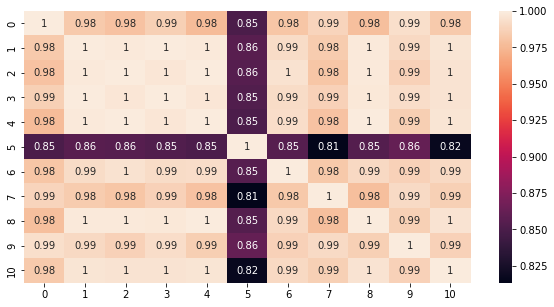

In [156]:
import seaborn as sns
plt.figure(figsize = (10,5))
sns.heatmap(df_med.corr(), annot=True)
plt.show()

In [145]:
num_event = len(df['event'])
num_cluster = len(df['nSc'])
ev_n = df['event']
event_number = data[0][0]
pedestal_event_number = data[2][0]

df_med['run'] = event_number
df_med['pedestal_run'] = pedestal_event_number

In [146]:
df_med

,run,event,pedestal_run,cmos_integral,cmos_mean,cmos_rms,nSc,sc_size,sc_nhits,sc_integral,...,sc_tgaussamp,sc_tgaussmean,sc_tgausssigma,sc_tchi2,sc_tstatus,sc_lgaussamp,sc_lgaussmean,sc_lgausssigma,sc_lchi2,sc_lstatus


In [181]:
########################################################################################################################################

In [162]:
columns = tf["Events;1"].keys()
df_test = pd.DataFrame(columns = columns)

In [163]:
df_test

,run,event,pedestal_run,cmos_integral,cmos_mean,cmos_rms,nSc,sc_size,sc_nhits,sc_integral,...,sc_tgaussamp,sc_tgaussmean,sc_tgausssigma,sc_tchi2,sc_tstatus,sc_lgaussamp,sc_lgaussmean,sc_lgausssigma,sc_lchi2,sc_lstatus


In [186]:
array_num_cluster = []
array_nSc = []
sub_array = []
cmos_integral = []
cmos_mean = []
cmos_rms = []
sc_size = []
for indice_nSc in range(len(df['nSc'])):
    array_num_cluster.append(df['nSc'][indice_nSc])
    for indice_interno_nSc in range(array_num_cluster[indice_nSc]):
        sub_array.append(indice_nSc)
        array_nSc.append(df['nSc'][indice_nSc])
        cmos_integral.append(df['cmos_integral'][indice_nSc])
        cmos_mean.append(df['cmos_mean'][indice_nSc])
        cmos_rms.append(df['cmos_rms'][indice_nSc])
        sc_size.append(final_np_array[indice_nSc][])
df_test['event']= sub_array
df_test['nSc'] = array_nSc
df_test['cmos_integral'] = cmos_integral
df_test['cmos_mean'] = cmos_mean
df_test['cmos_rms'] = cmos_rms
df_test['sc_size'] = sc_size

In [190]:
final_np_array[0]

array([ 717.29577465, 1671.27272727, 1388.        , 1733.14285714,
       1844.66666667,  984.72727273,  744.        ,  748.28571429,
       1919.26153846,  874.66666667, 1214.76923077])

In [187]:
df_test

,run,event,pedestal_run,cmos_integral,cmos_mean,cmos_rms,nSc,sc_size,sc_nhits,sc_integral,...,sc_tgaussamp,sc_tgaussmean,sc_tgausssigma,sc_tchi2,sc_tstatus,sc_lgaussamp,sc_lgaussmean,sc_lgausssigma,sc_lchi2,sc_lstatus
0,1173,0,1172,4817024.5,0.907432,3.151235,71,"[717.2957746478874, 1671.2727272727273, 1388.0...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1173,0,1172,4817024.5,0.907432,3.151235,71,"[717.2957746478874, 1671.2727272727273, 1388.0...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1173,0,1172,4817024.5,0.907432,3.151235,71,"[717.2957746478874, 1671.2727272727273, 1388.0...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1173,0,1172,4817024.5,0.907432,3.151235,71,"[717.2957746478874, 1671.2727272727273, 1388.0...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1173,0,1172,4817024.5,0.907432,3.151235,71,"[717.2957746478874, 1671.2727272727273, 1388.0...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,1173,10,1172,5064345.0,0.954022,3.269485,78,"[18.98804919820436, 28.80837264927951, 23.9175...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,1173,10,1172,5064345.0,0.954022,3.269485,78,"[18.98804919820436, 28.80837264927951, 23.9175...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
649,1173,10,1172,5064345.0,0.954022,3.269485,78,"[18.98804919820436, 28.80837264927951, 23.9175...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650,1173,10,1172,5064345.0,0.954022,3.269485,78,"[18.98804919820436, 28.80837264927951, 23.9175...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
num_event = len(df['event'])
num_cluster = len(df['nSc'])
num_sc = len(df["sc_integral"])
ev_n = df['event']
event_number = data[0][0]
pedestal_event_number = data[2][0]


df_test['run'] = event_number
df_test['pedestal_run'] = pedestal_event_number

In [171]:
df_test

,run,event,pedestal_run,cmos_integral,cmos_mean,cmos_rms,nSc,sc_size,sc_nhits,sc_integral,...,sc_tgaussamp,sc_tgaussmean,sc_tgausssigma,sc_tchi2,sc_tstatus,sc_lgaussamp,sc_lgaussmean,sc_lgausssigma,sc_lchi2,sc_lstatus
0,1173,0,1172,4817024.5,0.907432,3.151235,71,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1173,0,1172,4817024.5,0.907432,3.151235,71,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1173,0,1172,4817024.5,0.907432,3.151235,71,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1173,0,1172,4817024.5,0.907432,3.151235,71,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1173,0,1172,4817024.5,0.907432,3.151235,71,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,1173,10,1172,5064345.0,0.954022,3.269485,78,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,1173,10,1172,5064345.0,0.954022,3.269485,78,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
649,1173,10,1172,5064345.0,0.954022,3.269485,78,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650,1173,10,1172,5064345.0,0.954022,3.269485,78,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
df_test.columns

Index(['run', 'event', 'pedestal_run', 'cmos_integral', 'cmos_mean',
       'cmos_rms', 'nSc', 'sc_size', 'sc_nhits', 'sc_integral',
       'sc_corrintegral', 'sc_rms', 'sc_energy', 'sc_pathlength',
       'sc_redpixIdx', 'nRedpix', 'redpix_ix', 'redpix_iy', 'redpix_iz',
       'sc_theta', 'sc_length', 'sc_width', 'sc_longrms', 'sc_latrms',
       'sc_lfullrms', 'sc_tfullrms', 'sc_lp0amplitude', 'sc_lp0prominence',
       'sc_lp0fwhm', 'sc_lp0mean', 'sc_tp0fwhm', 'sc_xmean', 'sc_ymean',
       'sc_xmax', 'sc_xmin', 'sc_ymax', 'sc_ymin', 'sc_pearson',
       'sc_tgaussamp', 'sc_tgaussmean', 'sc_tgausssigma', 'sc_tchi2',
       'sc_tstatus', 'sc_lgaussamp', 'sc_lgaussmean', 'sc_lgausssigma',
       'sc_lchi2', 'sc_lstatus'],
      dtype='object')

In [ ]:
nRedpix
redpix_ix
redpix_iy
redpix_iz

In [182]:
final_np_array
    

[array([ 717.29577465, 1671.27272727, 1388.        , 1733.14285714,
        1844.66666667,  984.72727273,  744.        ,  748.28571429,
        1919.26153846,  874.66666667, 1214.76923077]),
 array([266.64788732, 613.43939394, 511.63461538, 640.76785714,
        737.5625    , 398.33766234, 283.42105263, 279.10714286,
        733.06153846, 323.6       , 487.87179487]),
 array([3005.90725815, 6578.39887943, 6092.59290343, 6735.93011607,
        9072.53271031, 4764.90677435, 3974.71388325, 3379.42096933,
        8394.33712604, 3642.65264825, 6465.96441667]),
 array([10367.86808476, 22498.92484445, 24340.58796956, 22509.67410169,
        33503.58605544, 16405.9591437 , 22260.1404186 , 12559.90625   ,
        28317.18715046, 12137.41050144, 23859.78819627]),
 array([ 8.40122325,  8.8205313 , 10.08712246,  8.43328427,  8.8550224 ,
         9.14386671, 10.291071  ,  9.98919151,  8.81090644,  7.89458161,
         9.58225746]),
 array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]),
 a

ValueError: Length of values (11) does not match length of index (652)

In [143]:
##-----DEVO INIZIARE A STUDIARE LA CORRELAZIONE TRA LE VARIABILI DEL CLUSTER; vorrei fare una heatmap.

In [17]:
#Creo un nuovo DF vuoto uguale a quello di prima.
name_corr = tf["Events;1"].keys()
columns_corr =  name
df_corr = pd.DataFrame(data = medie, columns = columns_corr)


In [18]:
df_corr

,run,event,pedestal_run,cmos_integral,cmos_mean,cmos_rms,nSc,sc_size,sc_nhits,sc_integral,...,sc_tgaussamp,sc_tgaussmean,sc_tgausssigma,sc_tchi2,sc_tstatus,sc_lgaussamp,sc_lgaussmean,sc_lgausssigma,sc_lchi2,sc_lstatus


In [16]:
num_event = len(df['event'])
num_cluster = len(df['nSc'])
num_sc = len(df["sc_integral"])
ev_n = df['event']
event_number = data[0][0]
pedestal_event_number = data[2][0]

final_sc_integral=[]
final_data = []
sc_integral = []
sc_nhits = []
event_array = []
sc_size = []
sc_tgaussamp= []
sc_tgaussmean= []
sc_tgausssigma= []
sc_tchi2= []
sc_tstatus= []
sc_lgaussamp= []
sc_lgaussmean= []
sc_lgausssigma= []
sc_lchi2= []
sc_lstatus= []

for i,nSc in enumerate(df['nSc']):
    #print(i, nSc)
    event_array.append(nSc)
    #print(event_array)
    for k in range(0,event_array[i]):
        sc_integral.append(df["sc_integral"][i][k])
    #print(len(sc_integral))
    #   event_array.append(k)
#print(sc_integral)    
   # for nsc_int in range(0,len(sc_integral)):
   #     final_sc_integral.append(sc_integral[nsc_int])
   #     
        sc_nhits.append(df["sc_nhits"][i][k])
        sc_size.append(df["sc_size"][i][k])
        sc_tgaussamp.append(df["sc_tgaussamp"][i][k])
        sc_tgaussmean.append(df["sc_tgaussmean"][i][k])
        sc_tgausssigma.append(df["sc_tgausssigma"][i][k])
        sc_tchi2.append(df["sc_tchi2"][i][k])
        sc_tstatus.append(df["sc_tstatus"][i][k])
        sc_lgaussamp.append(df["sc_lgaussamp"][i][k])
        sc_lgaussmean.append(df["sc_lgaussmean"][i][k])
        sc_lgausssigma.append(df["sc_lgausssigma"][i][k])
        sc_lchi2.append(df["sc_lchi2"][i][k])
        sc_lstatus.append(df["sc_lstatus"][i][k])
        #event_array.append()
        
#letters = set('sc_')

                  
        
    #   if num_cluster>1:
    #           for l in range(num_sc):
    #               
    #               df_corr['event'][l] = event_array[l]
    #               
    #   else:
    #           
    #           None
    #           

df_corr['sc_integral'] = sc_integral
df_corr['run'] = event_number
df_corr['pedestal_run'] = pedestal_event_number
df_corr['sc_nhits'] = sc_nhits
df_corr['sc_size'] = sc_size
df_corr['sc_tgaussamp'] =sc_tgaussamp
df_corr['sc_tgaussmean'] =sc_tgaussmean
df_corr['sc_tgausssigma'] =sc_tgausssigma
df_corr['sc_tchi2'] =sc_tchi2
df_corr['sc_tstatus'] =sc_tstatus
df_corr['sc_lgaussamp'] =sc_lgaussamp
df_corr['sc_lgaussmean'] =sc_lgaussmean
df_corr['sc_lgausssigma'] =sc_lgausssigma
df_corr['sc_lchi2'] =sc_lchi2
df_corr['sc_lstatus'] =sc_lstatus


In [13]:
array_num_cluster = []
array_nSc = []
sub_array = []
cmos_integral = []
cmos_mean = []
cmos_rms = []

for indice_nSc in range(len(df['nSc'])):
    array_num_cluster.append(df['nSc'][indice_nSc])
    for indice_interno_nSc in range(array_num_cluster[indice_nSc]):
        sub_array.append(indice_nSc)
        array_nSc.append(df['nSc'][indice_nSc])
        cmos_integral.append(df['cmos_integral'][indice_nSc])
        cmos_mean.append(df['cmos_mean'][indice_nSc])
        cmos_rms.append(df['cmos_rms'][indice_nSc])
df_corr['event']= sub_array
df_corr['nSc'] = array_nSc
df_corr['cmos_integral'] = cmos_integral
df_corr['cmos_mean'] = cmos_mean
df_corr['cmos_rms'] = cmos_rms
#print(len(sub_array))

In [17]:
df_corr  #mancano alcune vaiabili "sc_"

,run,event,pedestal_run,cmos_integral,cmos_mean,cmos_rms,nSc,sc_size,sc_nhits,sc_integral,...,sc_tgaussamp,sc_tgaussmean,sc_tgausssigma,sc_tchi2,sc_tstatus,sc_lgaussamp,sc_lgaussmean,sc_lgausssigma,sc_lchi2,sc_lstatus
0,1173,0,1172,4817024.5,0.907432,3.151235,71,7040.0,3909.0,56789.074219,...,1750.675781,52.842224,20.586283,5.253652e+02,3.0,869.548279,63.033546,39.637810,7.013192e+02,3.0
1,1173,0,1172,4817024.5,0.907432,3.151235,71,14944.0,5263.0,52182.792969,...,834.952759,64.309258,36.609806,9.390435e+02,3.0,151.973343,98.644745,736.171326,7.801997e+02,3.0
2,1173,0,1172,4817024.5,0.907432,3.151235,71,4032.0,1381.0,12084.108398,...,1308.691772,17.212496,7.179801,3.628479e+01,3.0,121.797096,125.398361,165.571716,3.333678e+02,3.0
3,1173,0,1172,4817024.5,0.907432,3.151235,71,4096.0,1296.0,11462.505859,...,1275.249756,26.531132,6.325240,6.960904e+01,3.0,135.414215,198.324265,86.233437,2.882851e+02,3.0
4,1173,0,1172,4817024.5,0.907432,3.151235,71,1504.0,612.0,9865.986328,...,1306.341309,15.031264,5.654314,2.786494e+01,3.0,413.829285,27.518478,20.186924,9.337569e+01,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,1173,10,1172,5064345.0,0.954022,3.269485,78,48.0,15.0,103.089127,...,95.023460,1.070118,0.791736,7.555160e-08,3.0,70.294701,5.705373,2.901127,3.299207e-10,2.0
648,1173,10,1172,5064345.0,0.954022,3.269485,78,48.0,13.0,76.355949,...,71.106194,4.806822,1.450976,8.454575e-09,2.0,57.597168,5.381381,2.758205,2.451698e-07,2.0
649,1173,10,1172,5064345.0,0.954022,3.269485,78,32.0,7.0,47.390896,...,75.306664,0.521559,0.380652,1.147622e-01,3.0,75.598160,3.299107,0.260555,4.129638e-09,2.0
650,1173,10,1172,5064345.0,0.954022,3.269485,78,48.0,13.0,14.185041,...,-43256.054688,7.026057,0.000000,1.338858e+00,1.0,6648.359375,16.124636,2.522840,5.910478e-02,3.0


In [15]:
##final_data = []
##final_sc_integral = []
##ev_n = df['event']
##name_corr_sc = name_corr[7:]
##name_corr_nosc = name_corr[0:7]
##lista_nosc = []
##lista_sc = []
###for index in range(len(name_corr)):
##for item in name_corr:
##    if "sc_" in name_corr:
##        lista_sc.append([])
##    else:
##        lista_nosc.append([])
##        
##clust_number_spec = df['nSc']
##for ievent in range(0,len (ev_n)):
##    clust_number = df['nSc'][ievent]
##    final_data.append(clust_number)
##    #df_corr['event'] = df['event'][ievent]
##    #
##    #print(ev_n[ievent])
##    
##    for n in range(0,clust_number):
##        #sc_integral = df['sc_integral'][ievent][n]
##        for o in range(len(lista_nosc)):
##            lista_nosc[o].append(df[name_corr_nosc[o]][ievent])
##        
##        
##            
##        #for k in range(0,len(sc_integral)):
##        #final_sc_integral.append(sc_integral)
##          #  run_num = df['run']
##        #df.insert(1,'sc_integral',sc_integral)
##      #  final_data.append([sc_integral])
##    

In [16]:
final_data = []
sc_integral = []
ev_n = df['event']
for ievent in range(0,len (ev_n)):
    for i in range(0, len(df['nSc'])):    
        for n in range(0,len(df["sc_integral"][i])):
            sc_integral = df['sc_integral'][ievent][n]
            final_data.append(sc_integral)
    

IndexError: index 71 is out of bounds for axis 0 with size 71

In [16]:
##ev_n = df['event']
##for ievent in range(0,len (ev_n)):
##    clust_number = df['nSc'][ievent]
##    #df_corr["event"] = i
##    df_corr["nSc"] = clust_number
##    
##    print(clust_number)
##    
  #  for icluster in range(0,clust_number):
  #      df_corr[""](icluster)
  #      #print(clust_number)

In [14]:
##numero_righe = len(df['event'])
##num_cluster = len(df['nSc'])
##num_sc = len(df["sc_integral"])
##
##
##for i,nSc in enumerate(df['nSc']):
##    scintegral = []
##    print(i, nSc)
##    
##    #for j in range(0,numero_righe):
##        for k in range(0,len(df["sc_integral"])):
##        #print(df["sc_integral"][j])
##            #df_corr.insert(1,"sc_integral",[df["sc_integral"][j][k]],allow_duplicates=True)
##            #np.insert(scintegral,[df["sc_integral"][j][k]])
##        #scintegral.append(df["sc_integral"][0][k]
##            scintegral.append(df["sc_integral"][i][k])
##print(len(scintegral))
##print(df["nSc"].sum())
    #numero_cluster = len(df['nSc'][i])
    #print(i, event)
 ##   #    df_corr[columns_corr[event]] = event
 ##       for i in range(0,len(name_corr)):
 ##       #for icolumn,datavalue in enumerate(data):
 ##       #print(columns[icolumn], datavalue)
 ##       #df[columns[icolumn]] = datavalue
 ##       
 ##       #df_corr = df_corr.append({'event': i}, ignore_index=True)
 ##           for k in range(0,numero_cluster):
 ##            #   print(event,i,k)
 ##               #df_corr[columns_corr[i]] = k

In [ ]:
#lung = len(df['nSc'])
#for icolumn,datavalue in enumerate(data):
#    for k in range(0,lung):
#        df_corr[columns_corr[icolumn]] = k 
    #if icolumn < 7:
    #    
    #    df_corr[columns_corr[icolumn]] = datavalue
    #else: 
    #    for k in range(0,lung):
    #        df_corr[columns_corr[icolumn]] = 99 

In [ ]:
#array = []
lung = len(df['nSc']) #lung è la lunghezza dlla variabile nSc
for k in range(0,lung):
    print("ciao")
    df_corr['nSc'] = k
   # for icluster in range(0,df['nSc'][k]):      #df['nSc'][k] fino al numero di cluster che ci sono   
      # df_corr[[columns_corr[k]]] = k 
      # df_corr['sc_integral'] = 9
 #      
        #array.append(data[7:]) #in questo array ci stanno i dati dal primo sc_* fino alla fine. Questi dovrebbero essere array tutti della stessa lunghezza
        #new_np_array = np.array(array) #adesso new_np_array è un array di numpy    
    
    
    #print(array) 
    #np.reshape(array,matrix)






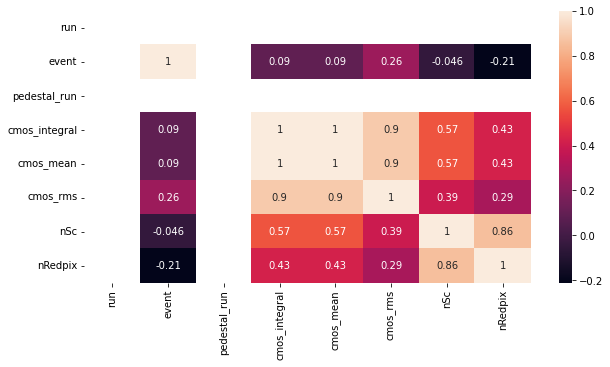

In [17]:
import seaborn as sns
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [15]:
##Per fare bene la heatmap devo andare a fare LA MEDIA di tutti gli array "sc_"